In [1]:
import random
import time
import matplotlib.pyplot as plt
import copy
import sys

In [2]:
sys.setrecursionlimit(10000)

# Fonctions Utiles

Les deux fonctions données plus bas sont utiles pour tester si un tableau ou un ensemble de tableaux sont bien
triés par ordre ascendant.

In [3]:
def isSorted(l):
    for i in range(len(l) - 1):
        if l[i] > l[i + 1]: return False
    return True

def areSorted(ll):
    for i in range(len(ll)):
        if not isSorted(ll[i]): return (False, i)
    return (True, 0)

# Création des tableaux

La fonction __create\_data__ permet de créer des listes qui contiennent les tableaux à trier avec des tailles
croissantes. Les paramètres par défaut sont 15 tableaux, et des tailles de tableaux qui augmentent  par incrément de 200. Par défaut, le plus petit tableau aura 200 éléments, le plus grand aura 3000 éléments.

In [4]:
def create_data(nlist=15, nval=200):
    
    # Création de listes de taille incrémentale et de contenu aléatoire
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    sizeArrays = []
    
    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i 
        dataRandom = s*[0]
        dataSorted = s*[0]
        dataInversed = s*[0]
        for j in range(s):
            dataRandom[j]=j
            dataSorted[j]=j
            dataInversed[j]=j
            
        dataInversed.reverse()
        random.shuffle(dataRandom)
        
        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        sizeArrays.append(s)

    return(sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted)


# Tri des tableaux

La fonction **executerTri** prend en entrée :

- la fonction qui va effectuer le tri **fct_tri**
- la couleur des tracés **color**
- le nom de l'algorithme de tri **nom**
- le nombre de tableaux **nlist** (utilisé par **create_data**)
- le nombre de valeurs dans le premier tableau **nval**  (utilisé par **create_data**)
- un booléen qui indique si le tableau est trié **surplace** ou si le tableau trié est renvoyé comme résultat de la fonction de tri



In [5]:
def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace = True):
    
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)
    
    toplotRandom = []
    toplotSorted = []
    toplotInverted = []
    
    dataTestRandom    = copy.deepcopy(listDataRandom)
    dataTestSorted    = copy.deepcopy(listDataSorted)
    dataTestInverted  = copy.deepcopy(listDataInvertedSorted)
    
    for i in range(len(axis)):
        time1 = time.time()
        if surplace:
            fct_tri(dataTestRandom[i])
        else:
            dataTestRandom[i] = fct_tri(dataTestRandom[i])
        time2 = time.time()
        toplotRandom.append(time2 - time1)
        time3 = time.time()
        if surplace:
            fct_tri(dataTestSorted[i])
        else:
            dataTestSorted[i] = fct_tri(dataTestSorted[i])
        time4 = time.time()
        toplotSorted.append(time4 - time3)
        time5 = time.time()
        if surplace:
            fct_tri(dataTestInverted[i])
        else:
            dataTestInverted[i] = fct_tri(dataTestInverted[i])
        time6 = time.time()
        toplotInverted.append(time6 - time5)

    (ok1, ipb1) = areSorted(dataTestRandom)
    (ok2, ipb2) = areSorted(dataTestSorted)
    (ok3, ipb3) = areSorted(dataTestInverted)
    
    if not ok1:
        print(nom + ' data random incorrect, liste #' + str(ipb1))
    else:
        plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    if not ok2:
        print(nom + ' data Sorted incorrect, liste #' + str(ipb2))
    else:
        plt.plot(axis, toplotSorted, '--' + color, label=nom + ' (Sorted)')

    if not ok3:
        print(nom + ' data Inverted incorrect, liste #' + str(ipb3))
    else:
        plt.plot(axis, toplotInverted, ':' + color, label=nom + ' (Inverted)')
        plt.legend()


# Algorithme de tri

l'algorithme **bubble_sort** est donné en exemple

In [6]:
def bubble_sort(A):
    n = len(A)
    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            if A[j]>A[j+1]:            
                t = A[j]
                A[j]=A[j+1]
                A[j+1] = t
                flag = 1
        if flag == 0:
            break
    return A

# Complexité empirique

le résultat de **executer_tri** avec l'algorithme **bubble_sort** est donné en exemple

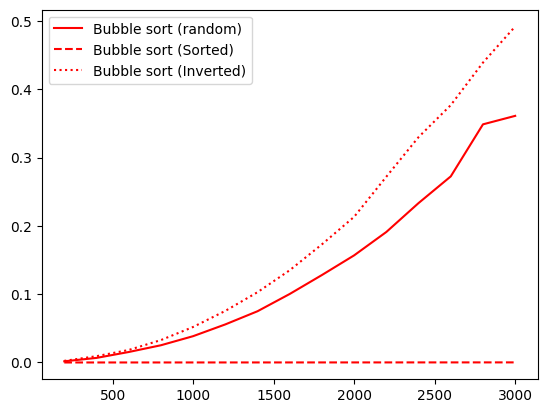

In [7]:
executerTri(bubble_sort,'r','Bubble sort')